In [1]:
import pandas as pd
from pathlib import Path
import os

upper_limit = 999999999
lower_limit = 1000

directory = Path(os.getcwd())   # 'c:\\Users\\samue\\OneDrive\\Desktop\\JPM Fintech\\HKUST-x-J.P.-Morgan-Fintech-Mentorship-Program\\model_testing\\supervised'
directory = directory.parent.parent.parent.joinpath("data")  # 'c:\\Users\\samue\\OneDrive\\Desktop\\JPM Fintech\\data'
df = pd.read_pickle(directory.joinpath("stocktwits_processed_cleaned_full.pkl"))
# remove symbols with too little sample size
df = df.groupby('symbols').filter(lambda x : len(x)> lower_limit)
# turn all symbols into the same sample size
#i = sample
for j in set(df['symbols']):
    if df['symbols'].value_counts()[j] > upper_limit:
        df = df[df['symbols'] != j].append(df[df['symbols'] == j].sample(upper_limit), ignore_index=True)
df['symbols'].value_counts(), len(df['symbols'].value_counts())

($BTC.X    36937
 $TSLA     30358
 $AAPL     18506
 $BABA     15801
 $QQQ      12404
 $NVDA      9079
 $NFLX      6248
 $AMZN      5689
 $JPM       5455
 $QCOM      5412
 $GOOGL     5083
 $TSM       4938
 $JD        4812
 $MS        4387
 $PYPL      3979
 $FB        3826
 $SBUX      3050
 $GS        2894
 $DIS       2782
 $MSFT      2598
 $JNJ       2580
 $TWTR      1937
 $INTC      1677
 $KO        1577
 $ORCL      1328
 $WMT       1183
 $EBAY      1120
 $C         1069
 $BAC       1013
 Name: symbols, dtype: int64,
 29)

In [5]:

ratio = 0.7
df_train = df.sample(frac=ratio,random_state=200)
df_test = df.drop(df_train.index)

X_train = df_train.text
X_test = df_test.text
    
y_train = df_train.symbols
y_test = df_test.symbols

print("{} unique classes\t{} training samples\t{} test samples".format(len(set(y_train)), len(X_train), len(X_test)))

#X = df.text
#y = df.symbols

29 unique classes	138405 training samples	59317 test samples


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


# Build the model
model = Pipeline([('tfidf', TfidfVectorizer(max_df=0.15, ngram_range=(1, 2))),
                ('clf', ComplementNB(alpha=0.1))])

#model = Pipeline([('tfidf', TfidfVectorizer(max_df=0.15, ngram_range=(1, 2))),
                #('smote', SMOTE(n_jobs=4)),
                #('clf', LinearSVC())])


#para_grid = {"tfidf__ngram_range": [(1,2), (1,3)], 
            #"tfidf__max_df": [0.05,0.1,0.15],
            #"tfidf__sublinear_tf": [True, False],
            #"clf__alpha": [0.1,1],
            #"clf__norm": [True, False]}

#model = GridSearchCV(model, param_grid=para_grid, scoring='f1_macro', cv=10, n_jobs=4)
model.fit(X_train, y_train)
# Predict the symbols of the test data
#print(model.best_estimator_)
y_pred = model.predict(X_test)
# accuracy
print("The accuracy is {}".format(accuracy_score(y_test, y_pred)))

#print(classification_report(y_test, y_pred))
print()
report = classification_report(y_test, y_pred)
#classification_report_csv(report,a,b)   



The accuracy is 0.7209400340543183



In [7]:
model.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.15, ngram_range=(1, 2))),
                ('clf', ComplementNB(alpha=0.1))])

In [ ]:
Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.1, ngram_range=(1, 2))),
                ('clf', ComplementNB(alpha=0.1, norm=True))])
The accuracy is 0.716034189186911

In [19]:

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       $AAPL       0.68      0.62      0.65      5555
       $AMZN       0.78      0.53      0.63      1703
       $BABA       0.69      0.60      0.64      4829
        $BAC       0.66      0.47      0.55       312
      $BTC.X       0.71      0.88      0.78     11094
          $C       0.84      0.46      0.59       335
        $DIS       0.76      0.49      0.60       796
       $EBAY       0.82      0.75      0.78       332
         $FB       0.64      0.38      0.48      1202
      $GOOGL       0.74      0.89      0.81      1549
         $GS       0.84      0.75      0.79       911
       $INTC       0.80      0.52      0.63       516
         $JD       0.77      0.75      0.76      1470
        $JNJ       0.72      0.88      0.79       740
        $JPM       0.86      0.84      0.85      1625
         $KO       0.71      0.85      0.77       449
         $MS       0.73      0.93      0.82      1299
       $MSFT       0.63    

In [25]:
name = ['$AAPL','$AMZN','$BABA','$BTC.X','$JPM','$NVDA','$NFLX','$QCOM', '$QQQ','$TSLA']

In [8]:
from joblib import dump, load
dump(model, 'models/ComplementNB.joblib') 

['models/ComplementNB.joblib']

In [21]:
y_pred = clf.predict(X_test)


Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.7)),
                ('imbl', SMOTE(n_jobs=-3)), ['clf', LinearSVC()]])

In [22]:
accuracy_score(y_test, y_pred)

0.6590690695753325

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       $AAPL       0.60      0.60      0.60      5542
       $AMZN       0.86      0.48      0.62      1744
       $BABA       0.64      0.54      0.58      4839
        $BAC       0.62      0.12      0.20       312
        $BTC       0.00      0.00      0.00       208
      $BTC.X       0.57      0.91      0.70     11128
          $C       0.66      0.18      0.28       336
        $DIS       0.73      0.47      0.57       798
       $EBAY       0.81      0.45      0.58       348
         $FB       0.70      0.34      0.46      1182
      $GOOGL       0.54      0.76      0.63      1537
         $GS       0.58      0.54      0.56       871
       $HSBC       0.86      0.66      0.75       182
       $INTC       0.91      0.35      0.50       511
         $JD       0.65      0.36      0.46      1434
        $JNJ       0.79      0.58      0.67       759
        $JPM       0.66      0.71      0.68      1571
         $KO       0.70    

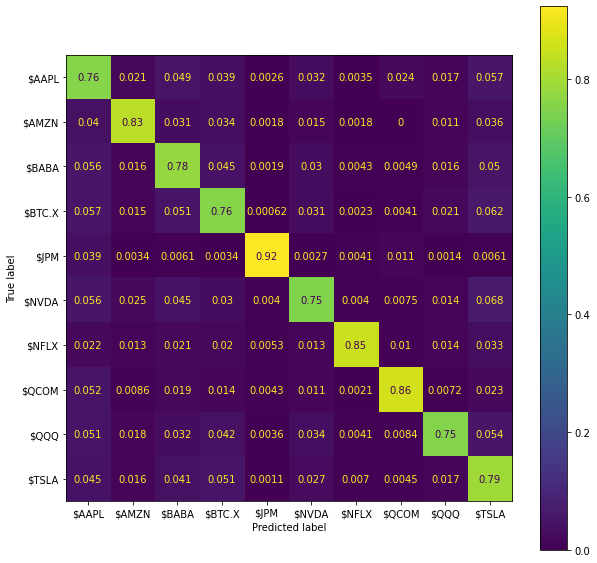

In [56]:
# plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
mat = plot_confusion_matrix(model,y_test, y_pred, labels=name,normalize='true',ax=ax)
mat


In [14]:
from joblib import dump, load
clf = load('models/linearSVC.joblib')
to_predict = input("Text to be predicted: ")
clf.predict([to_predict])[0]

'$MSFT'